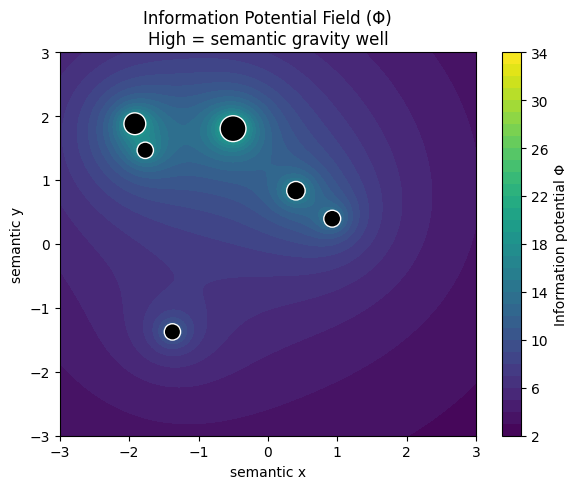

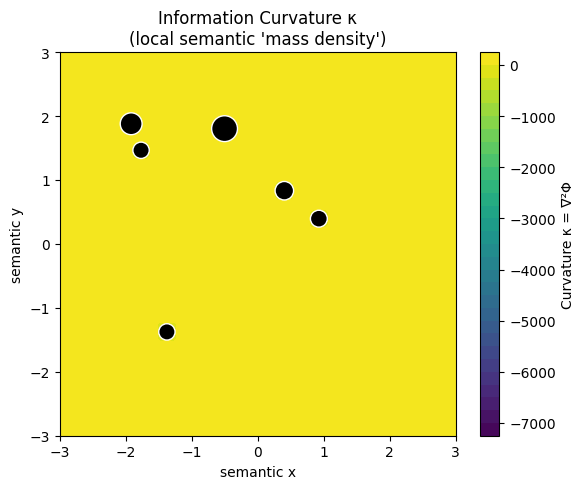

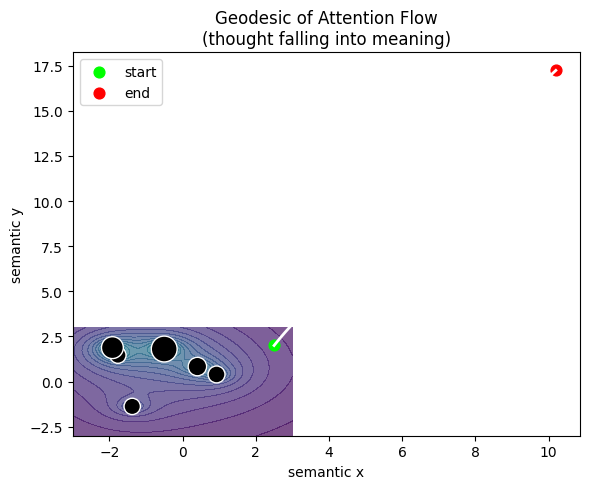

=== Information Gravity Diagnostics ===
Concept masses (information mass): [4.33 1.85 1.73 1.73 2.22 3.1 ]
Strongest attractor index at end: 0
Peak curvature κ (semantic density): 42.408
Interpretation:
- Φ is like an attention well.
- κ = ∇²Φ is local semantic density, i.e. 'curvature of meaning'.
- The trajectory is a geodesic: a drifting thought pulled toward high-information regions.


In [1]:
import numpy as np, matplotlib.pyplot as plt, os

# reproducibility
np.random.seed(42)

os.makedirs("figures", exist_ok=True)

# ---------------------------
# 1. generate "concepts"
# ---------------------------
N = 6  # number of salient ideas
concept_pos = np.random.uniform(-2, 2, size=(N,2))  # (x,y)
concept_mass = np.random.uniform(1, 5, size=N)      # "information mass"

# grid to evaluate field
grid_res = 200
xs = np.linspace(-3,3,grid_res)
ys = np.linspace(-3,3,grid_res)
XX, YY = np.meshgrid(xs, ys)

eps = 0.15

def phi_at(x,y):
    r = np.stack([x*np.ones(N), y*np.ones(N)], axis=1)  # shape (N,2)
    dist = np.linalg.norm(r - concept_pos, axis=1)
    return np.sum(concept_mass/(dist+eps))

# compute potential Phi(x,y)
Phi = np.zeros_like(XX)
for i in range(grid_res):
    for j in range(grid_res):
        Phi[i,j] = phi_at(XX[i,j], YY[i,j])

# numerical gradients for g = -grad Phi
dPhidx, dPhidy = np.gradient(Phi, xs, ys)
gx = -dPhidx
gy = -dPhidy

# curvature kappa ~ Laplacian Phi
d2Phidx2, _ = np.gradient(dPhidx, xs, ys)
_, d2Phidy2 = np.gradient(dPhidy, xs, ys)
kappa = d2Phidx2 + d2Phidy2

# ---------------------------
# 2. simulate geodesic path
# ---------------------------
dt = 0.02
T = 6.0
steps = int(T/dt)

# start a "thought" somewhere in space
r = np.zeros((steps,2))
v = np.zeros((steps,2))
r[0] = np.array([2.5, 2.0])
v[0] = np.array([0.0, 0.0])

def interp_field(x,y,FX):
    # bilinear-ish nearest sample
    ix = np.argmin(np.abs(xs-x))
    iy = np.argmin(np.abs(ys-y))
    ix = np.clip(ix, 0, grid_res-1)
    iy = np.clip(iy, 0, grid_res-1)
    return np.array([FX[0][iy,ix], FX[1][iy,ix]])

for t in range(steps-1):
    g_here = interp_field(r[t,0], r[t,1], (gx,gy))
    # dv/dt = g, dr/dt = v
    v[t+1] = v[t] + dt*g_here
    r[t+1] = r[t] + dt*v[t+1]

# ---------------------------
# 3. plotting
# ---------------------------

# (a) potential field
plt.figure(figsize=(6,5))
plt.contourf(XX, YY, Phi, levels=30)
plt.colorbar(label="Information potential Φ")
plt.scatter(concept_pos[:,0], concept_pos[:,1],
            s=80*concept_mass, edgecolor='white', facecolor='black')
plt.title("Information Potential Field (Φ)\nHigh = semantic gravity well")
plt.xlabel("semantic x")
plt.ylabel("semantic y")
plt.tight_layout()
plt.savefig("figures/field_potential.png", dpi=300)
plt.show()

# (b) curvature map
plt.figure(figsize=(6,5))
plt.contourf(XX, YY, kappa, levels=30)
plt.colorbar(label="Curvature κ = ∇²Φ")
plt.scatter(concept_pos[:,0], concept_pos[:,1],
            s=80*concept_mass, edgecolor='white', facecolor='black')
plt.title("Information Curvature κ\n(local semantic 'mass density')")
plt.xlabel("semantic x")
plt.ylabel("semantic y")
plt.tight_layout()
plt.savefig("figures/curvature_map.png", dpi=300)
plt.show()

# (c) geodesic path
plt.figure(figsize=(6,5))
plt.contourf(XX, YY, Phi, levels=30, alpha=0.7)
plt.plot(r[:,0], r[:,1], color='white', linewidth=2)
plt.scatter(r[0,0], r[0,1], color='lime', s=60, label="start")
plt.scatter(r[-1,0], r[-1,1], color='red', s=60, label="end")
plt.scatter(concept_pos[:,0], concept_pos[:,1],
            s=80*concept_mass, edgecolor='white', facecolor='black')
plt.legend()
plt.title("Geodesic of Attention Flow\n(thought falling into meaning)")
plt.xlabel("semantic x")
plt.ylabel("semantic y")
plt.tight_layout()
plt.savefig("figures/geodesic_path.png", dpi=300)
plt.show()

# diagnostics
final_distances = np.linalg.norm(r[-1] - concept_pos, axis=1)
closest_idx = np.argmin(final_distances)

print("=== Information Gravity Diagnostics ===")
print(f"Concept masses (information mass): {np.round(concept_mass,2)}")
print(f"Strongest attractor index at end: {closest_idx}")
print(f"Peak curvature κ (semantic density): {np.max(kappa):.3f}")
print("Interpretation:")
print("- Φ is like an attention well.")
print("- κ = ∇²Φ is local semantic density, i.e. 'curvature of meaning'.")
print("- The trajectory is a geodesic: a drifting thought pulled toward high-information regions.")
